In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
avo=pd.read_csv('avocado.csv')
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
avo.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
avo.shape

(1517, 14)

In [5]:
avo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
#converting object to datetype
avo['Date']=avo['Date'].astype('datetime64[D]')

In [7]:
#creating a new column named month
avo['month']=avo['Date'].dt.month_name()

In [8]:
avo.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                   object
dtype: object

In [9]:
#dropping the unnamed column as it is not necessary
#dropped date because we have another attribute as year
#dropped types because the datset is dealing with only one knid of Avocado

avo.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
avo

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,June
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,October
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,September
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,February
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,September


In [10]:
avo.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,June
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,November
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,November
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,August
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,January
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,October


In [11]:
avo.tail(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
1507,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.00,conventional,2016,Charlotte,November
1508,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.00,conventional,2016,Charlotte,November
1509,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,45861.67,6586.31,0.00,conventional,2016,Charlotte,June
1510,1.58,142955.49,39376.44,29382.30,26881.22,47315.53,40258.68,6816.57,240.28,conventional,2016,Charlotte,October
1511,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,47060.46,5658.79,0.00,conventional,2016,Charlotte,October
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,October
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,September
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,February
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,September
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte,September


In [12]:
#checking duplicates
dups=avo.duplicated(keep='first').sum()
dups

0

no duplicated values

In [13]:
#checking for null values
avo.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

no trace of any null values

In [14]:
avo.max()

AveragePrice                1.68
Total Volume         4.46555e+07
4046                  1.8933e+07
4225                 1.89565e+07
4770                 1.38152e+06
Total Bags            6.7363e+06
Small Bags           5.89364e+06
Large Bags           1.12108e+06
XLarge Bags               108073
type                conventional
year                        2016
region          WestTexNewMexico
month                  September
dtype: object

In [15]:
avo.min()

AveragePrice            0.49
Total Volume         38750.7
4046                  467.72
4225                 1783.77
4770                       0
Total Bags           3311.77
Small Bags           3311.77
Large Bags                 0
XLarge Bags                0
type            conventional
year                    2015
region                Albany
month                  April
dtype: object

In [16]:
avo.mean()

AveragePrice    1.074990e+00
Total Volume    1.601879e+06
4046            6.464387e+05
4225            6.114375e+05
4770            5.040550e+04
Total Bags      2.935974e+05
Small Bags      2.487736e+05
Large Bags      4.264205e+04
XLarge Bags     2.181771e+03
year            2.015163e+03
dtype: float64

In [17]:
avo.median()

AveragePrice         1.08
Total Volume    402791.86
4046             81751.17
4225            118664.89
4770              7688.17
Total Bags       73979.06
Small Bags       62375.69
Large Bags        5044.35
XLarge Bags          0.00
year              2015.00
dtype: float64

In [18]:
avo.std()

AveragePrice    1.888912e-01
Total Volume    4.433143e+06
4046            1.947614e+06
4225            1.672906e+06
4770            1.377812e+05
Total Bags      7.579765e+05
Small Bags      6.474765e+05
Large Bags      1.182157e+05
XLarge Bags     7.455712e+03
year            3.693244e-01
dtype: float64

In [19]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month            object
dtype: object

In [20]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
month           1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [21]:
for i in ('type','region','year','month'):
    vc=avo[i].value_counts()
    print('Total number of unique values in attribute, ', i ,', is\n ', vc,'\n','-'*30)

Total number of unique values in attribute,  type , is
  conventional    1517
Name: type, dtype: int64 
 ------------------------------
Total number of unique values in attribute,  region , is
  California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21

In [22]:
avo.groupby(avo['region']).mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.238657,7.629020e+04,1.732056e+03,6.185452e+04,537.329104,1.216629e+04,1.181550e+04,347.246866,3.547164,2015.223881
Atlanta,1.012037,4.676372e+05,3.214885e+05,5.904953e+04,881.809444,8.621736e+04,4.740999e+04,38747.062407,60.306481,2015.277778
BaltimoreWashington,1.160923,8.076442e+05,5.863856e+04,5.261738e+05,38148.926769,1.846829e+05,1.801890e+05,4221.447231,272.483077,2015.369231
Boise,0.974923,8.104617e+04,4.279847e+04,6.462111e+03,5731.225385,2.605436e+04,2.526996e+04,748.342154,36.056308,2015.615385
Boston,1.205484,5.534586e+05,7.450542e+03,4.024276e+05,21224.216935,1.223562e+05,1.210160e+05,764.848710,575.326935,2015.709677
BuffaloRochester,1.301569,1.321844e+05,1.576289e+03,6.379754e+04,195.697255,6.661483e+04,6.554765e+04,384.352549,682.826667,2015.823529
California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
Charlotte,1.311613,1.762781e+05,4.332415e+04,4.502836e+04,29937.738710,5.798790e+04,5.270983e+04,5230.527742,47.535806,2015.483871
Chicago,1.214783,8.118822e+05,3.814420e+04,5.681663e+05,107273.196087,9.829844e+04,9.470367e+04,3061.164348,533.601304,2015.000000


In [23]:
avo.groupby(avo['type']).mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821


In [24]:
avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [25]:
o=['object']
avo.describe(include=o)

,type,region,month
count,1517,1517,1517
unique,1,51,12
top,conventional,California,May
freq,1517,76,160


In [26]:
#implementing graphical methods for more EDA

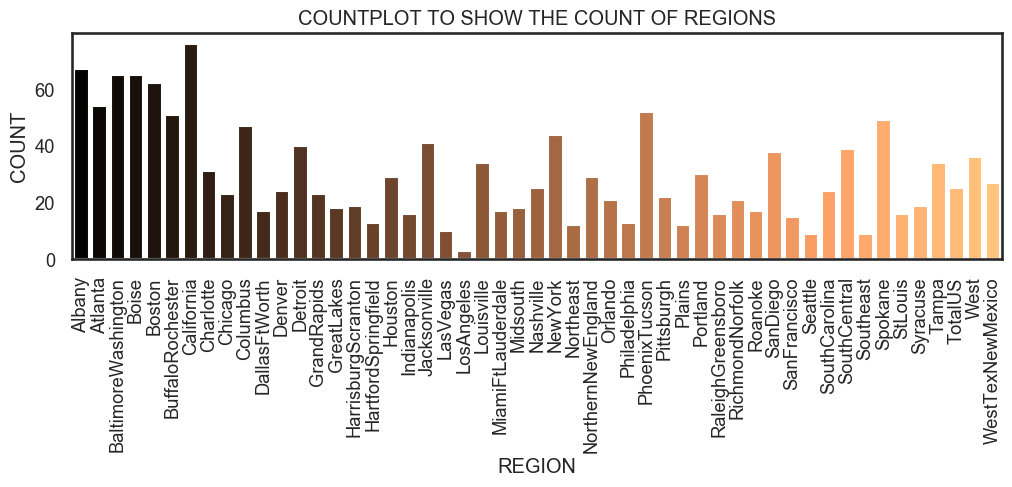

In [27]:
sns.set(style='white')
plt.figure(figsize=(12,3),dpi=100)
sns.set_context('talk',font_scale=0.8)
m1=sns.countplot(x='region',data=avo,orient='v',saturation=18,palette='copper')
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('REGION')
plt.ylabel('COUNT')
plt.title('COUNTPLOT TO SHOW THE COUNT OF REGIONS')
plt.show()

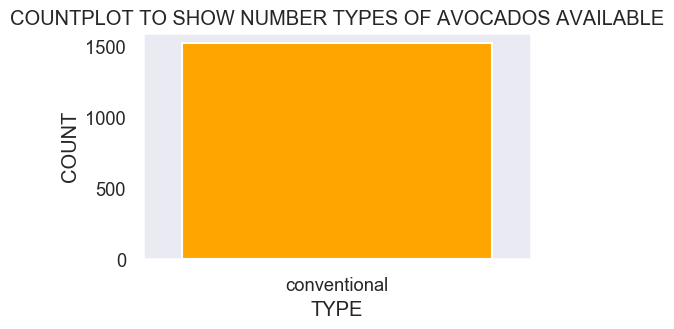

In [28]:
sns.set(style='dark')
plt.figure(figsize=(5,3),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.countplot(x='type',data=avo,orient='v',saturation=18,color='orange')
plt.xlabel('TYPE')
plt.ylabel('COUNT')
plt.title('COUNTPLOT TO SHOW NUMBER TYPES OF AVOCADOS AVAILABLE')
plt.show()

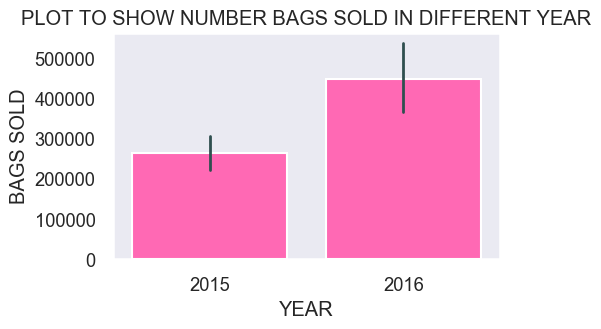

In [29]:
sns.set(style='dark')
plt.figure(figsize=(5,3),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.barplot(x='year', y='Total Bags', data=avo,ci=95,orient='v', color='hotpink', saturation=25, errcolor='darkslategrey', errwidth=2)
plt.xlabel('YEAR')
plt.ylabel('BAGS SOLD')
plt.title('PLOT TO SHOW NUMBER BAGS SOLD IN DIFFERENT YEAR')
plt.show()

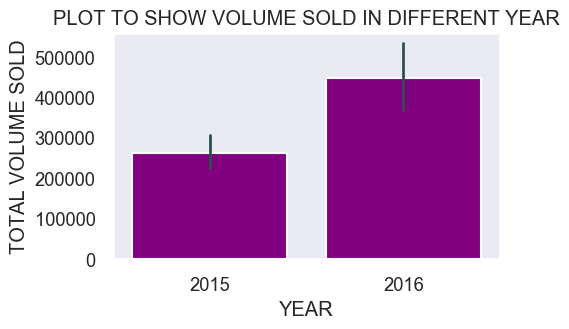

In [30]:
sns.set(style='dark')
plt.figure(figsize=(5,3),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.barplot(x='year', y='Total Bags', data=avo,ci=95,orient='v', color='purple', saturation=25, errcolor='darkslategrey', errwidth=2)
plt.xlabel('YEAR')
plt.ylabel('TOTAL VOLUME SOLD')
plt.title('PLOT TO SHOW VOLUME SOLD IN DIFFERENT YEAR')
plt.show()

            The demand of avocado is high in 2016 as compared to 2015

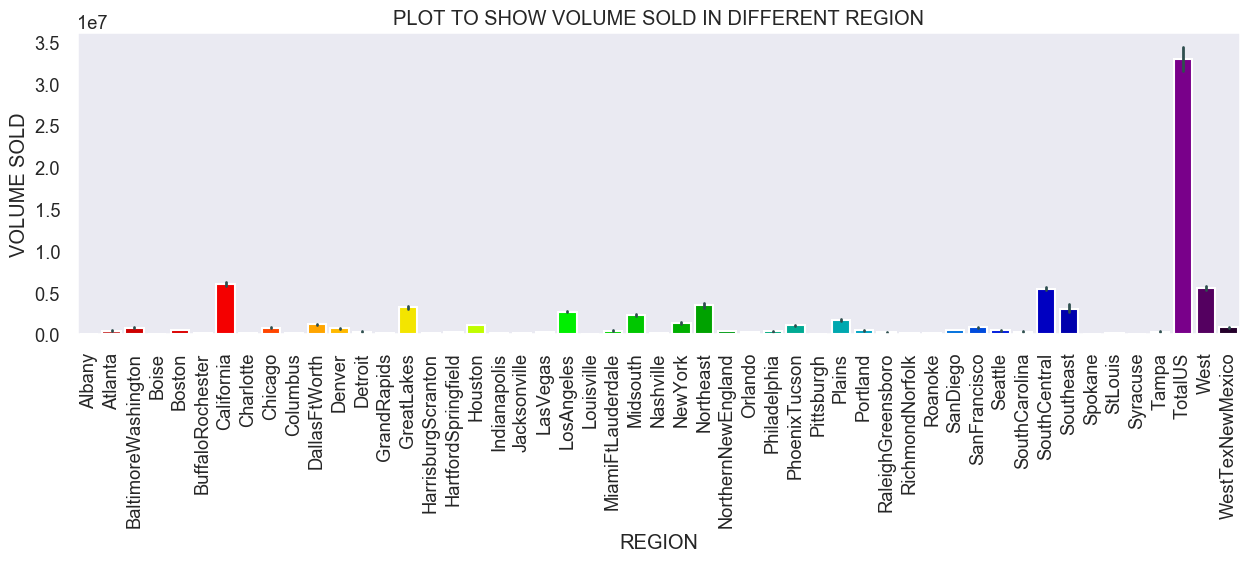

In [31]:
sns.set(style='dark')
plt.figure(figsize=(15,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
m1=sns.barplot(x='region', y='Total Volume',data=avo,ci=95,orient='v', palette='nipy_spectral_r', saturation=25, errcolor='darkslategrey', errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('REGION')
plt.ylabel('VOLUME SOLD')
plt.title('PLOT TO SHOW VOLUME SOLD IN DIFFERENT REGION')
plt.show()

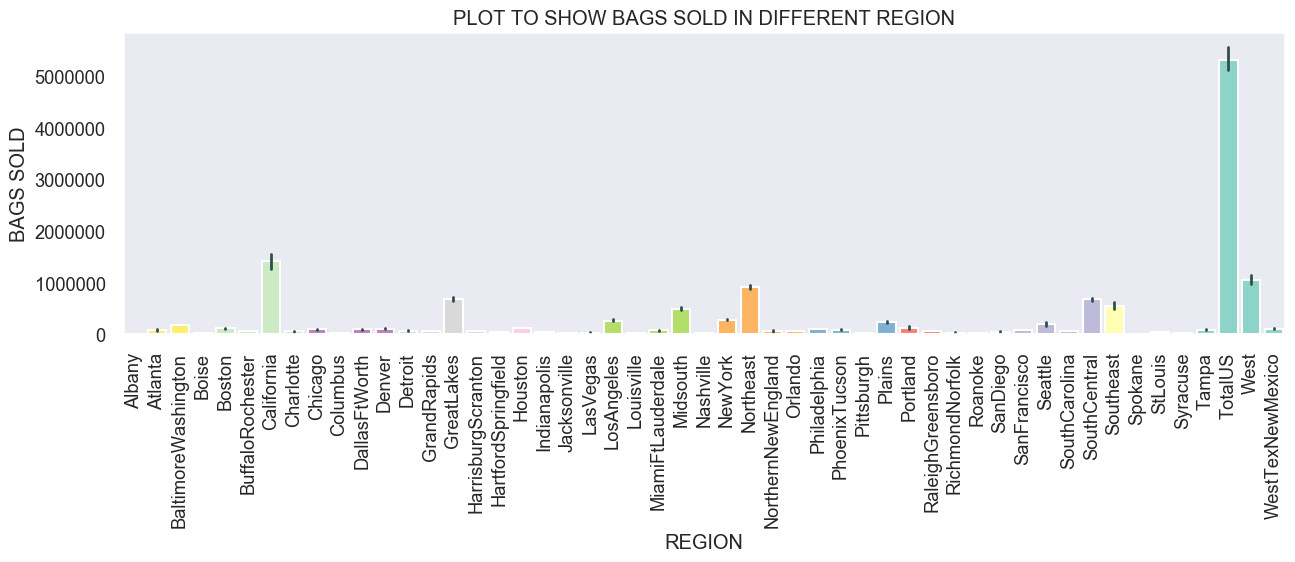

In [32]:
sns.set(style='dark')
plt.figure(figsize=(15,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
m1=sns.barplot(x='region', y='Total Bags',data=avo,ci=95,orient='v', palette='Set3_r', saturation=25, errcolor='darkslategrey', errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('REGION')
plt.ylabel('BAGS SOLD')
plt.title('PLOT TO SHOW BAGS SOLD IN DIFFERENT REGION')
plt.show()

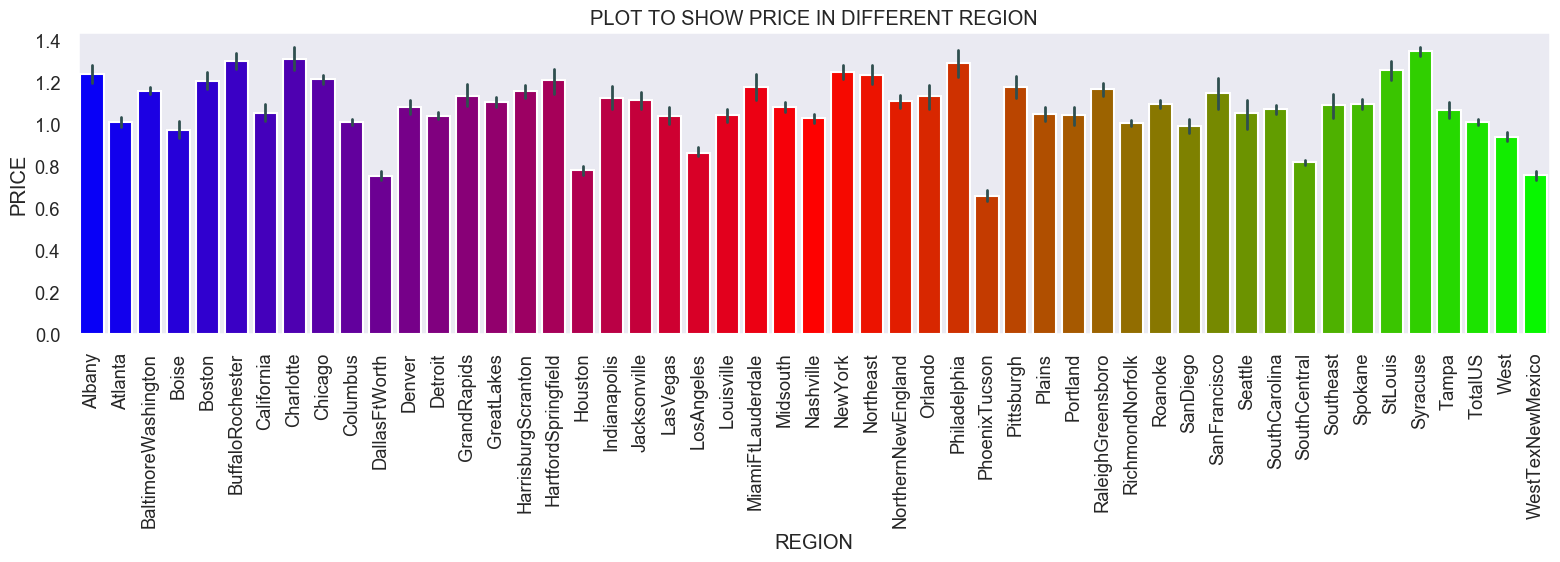

In [33]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
m1=sns.barplot(x='region', y='AveragePrice',data=avo,ci=95,orient='v', palette='brg', saturation=25, errcolor='darkslategrey', errwidth=2)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.xlabel('REGION')
plt.ylabel('PRICE')
plt.title('PLOT TO SHOW PRICE IN DIFFERENT REGION')
plt.show()

                    THE AVG PRICE OF AVOCADO IS LOW IN 'PHEONIXTUCSON' WHILE IT IS 'HIGH IN SYRCUSE'

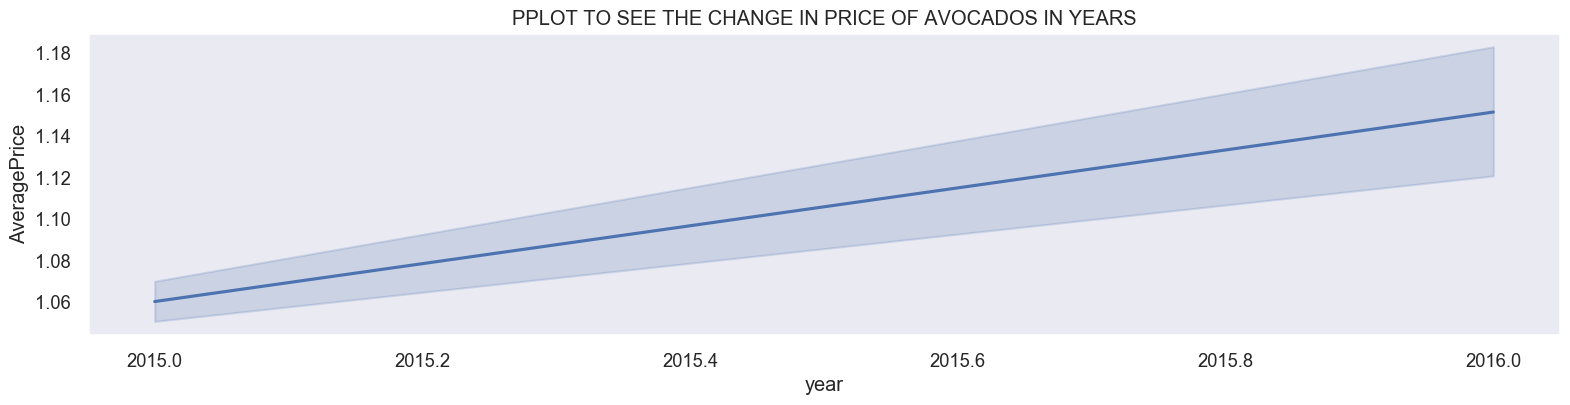

In [34]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.lineplot(x='year', y='AveragePrice',data=avo,estimator='mean',ci=95)
plt.title('PPLOT TO SEE THE CHANGE IN PRICE OF AVOCADOS IN YEARS')
plt.show()
                 

                    The plot is showing a steady increase in price from 2015 to 2016

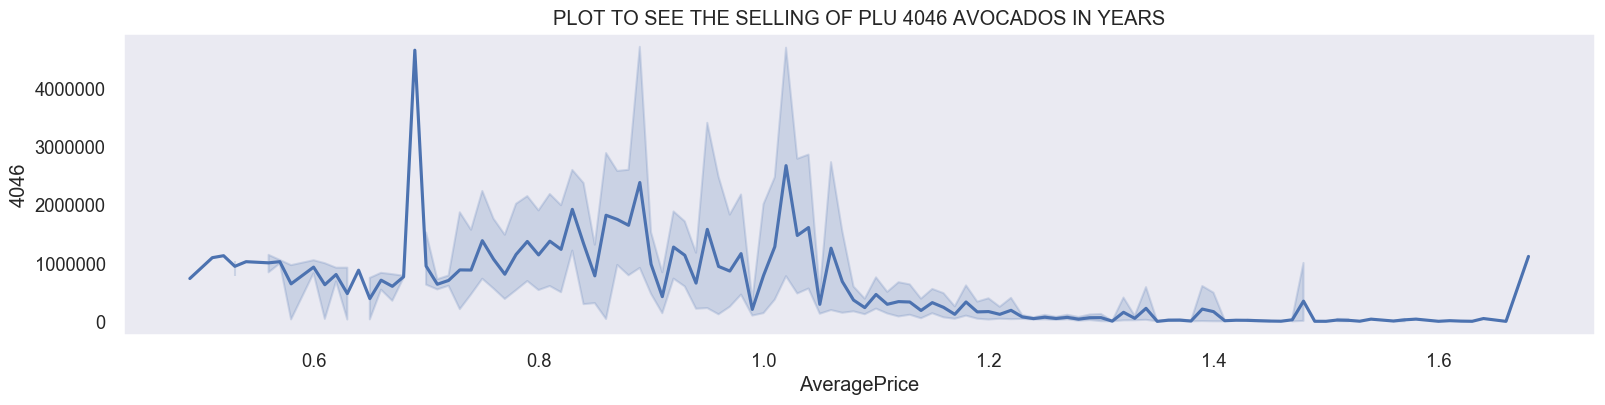

In [35]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.lineplot(x='AveragePrice', y='4046', data=avo,estimator='mean',ci=95)
plt.title('PLOT TO SEE THE SELLING OF PLU 4046 AVOCADOS IN YEARS')
plt.show()
                 

                           THE PLOT IS SHOWING A DECREASE IN SELL OF PLU 4046 AT HIGHER PRICE OF 1.6

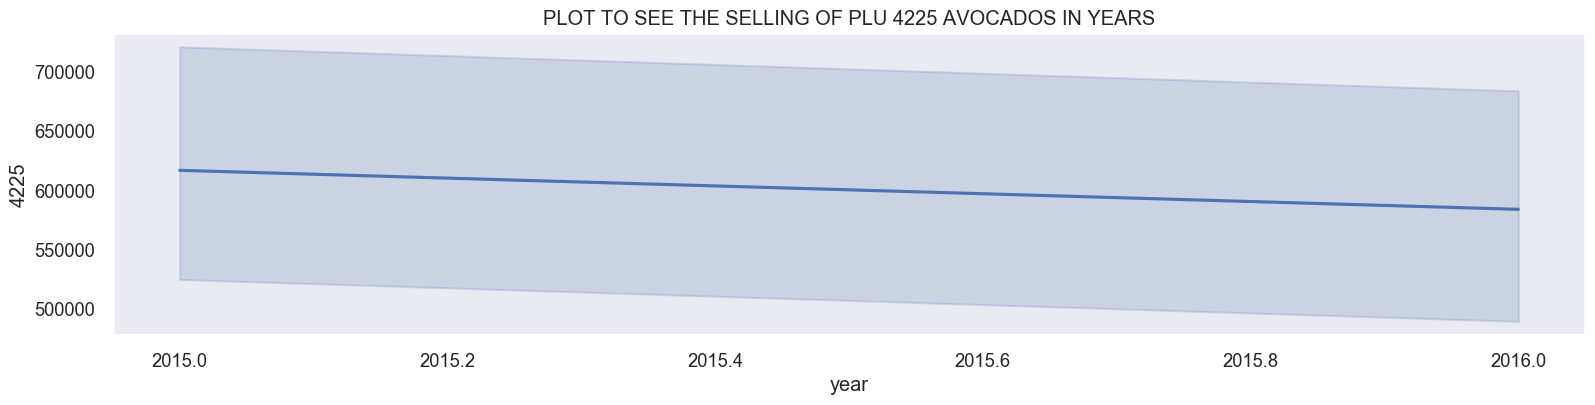

In [36]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.lineplot(x='year', y='4225', data=avo,estimator='mean',ci=95)
plt.title('PLOT TO SEE THE SELLING OF PLU 4225 AVOCADOS IN YEARS')
plt.show()
                 

        THE PLOT IS SHOWING MILD DECREASE IN DEMAND OF PLU 4225 FROM 2015 TO 2016

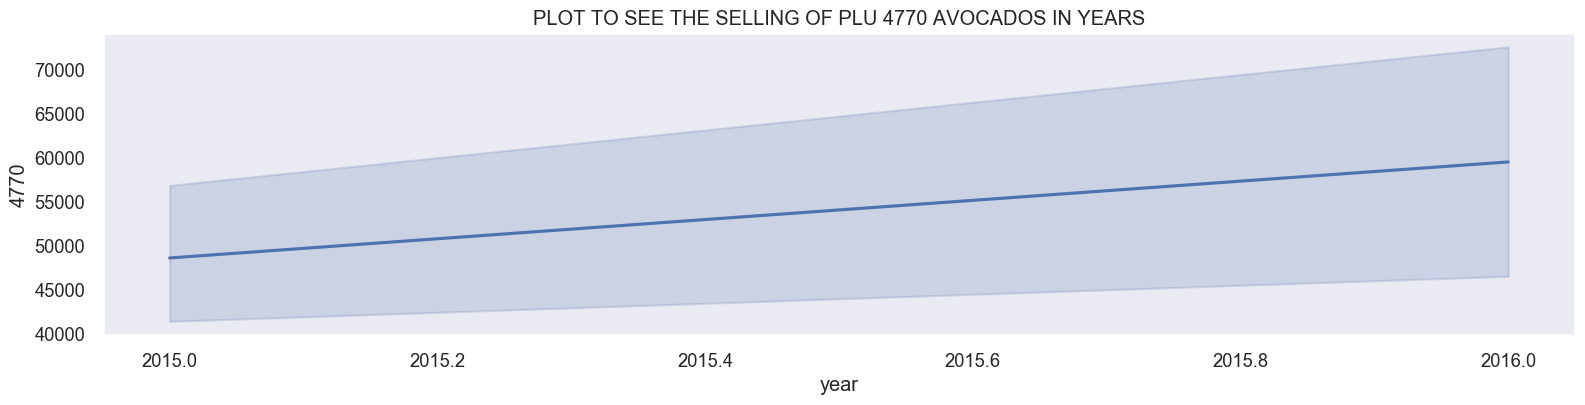

In [37]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.lineplot(x='year', y='4770', data=avo,estimator='mean',ci=95)
plt.title('PLOT TO SEE THE SELLING OF PLU 4770 AVOCADOS IN YEARS')
plt.show()
                 

                THE PLOT IS SHOWING A INCREASE IN SELL OF PLU4770 CATEGORY AVOCADOS FROM YEAR 2015 TO 2016 

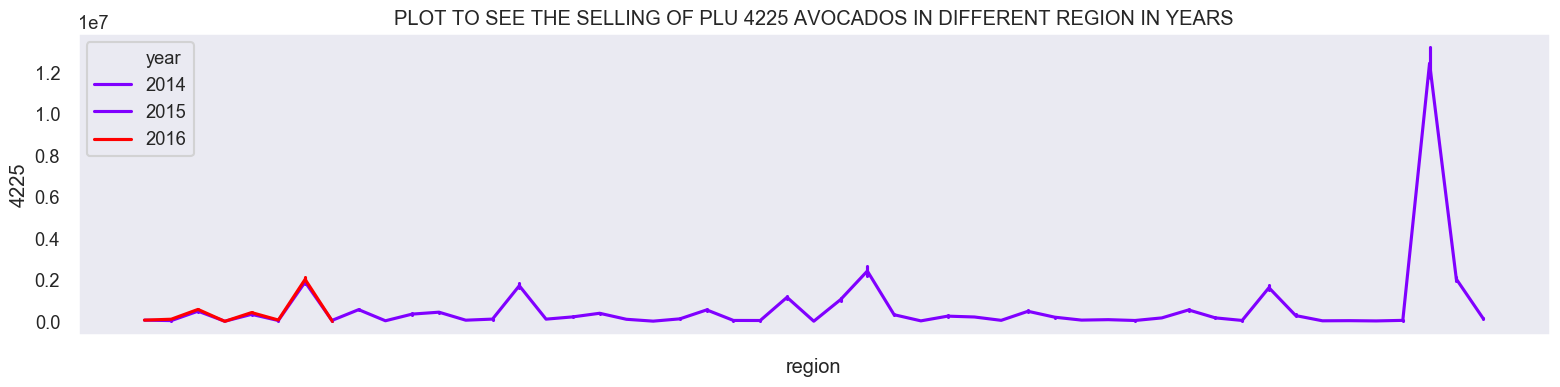

In [38]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
m1=sns.lineplot(x='region',y='4225',hue='year',palette='rainbow', data=avo,ci=95,err_style='bars')
m1.set_xticklabels(m1.get_xticklabels(),rotation=75)
plt.title('PLOT TO SEE THE SELLING OF PLU 4225 AVOCADOS IN DIFFERENT REGION IN YEARS')
plt.show()
                 

            THE PLOT IS SHOWING THAT BY 2016 THE SELL OF 4225 HAS FALLEN DOWN 

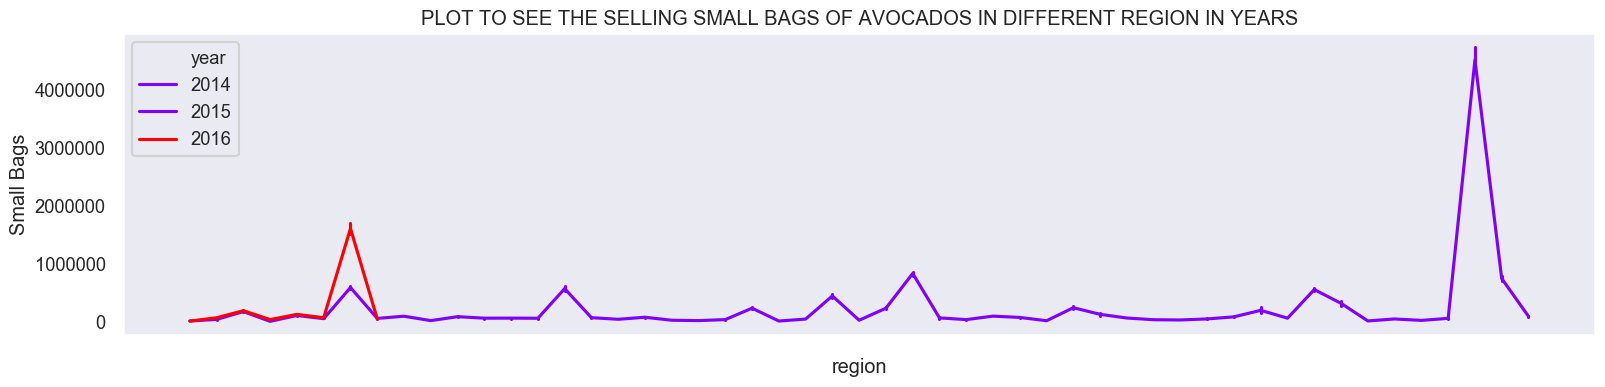

In [39]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
M=sns.lineplot(x='region',y='Small Bags',hue='year',palette='rainbow', data=avo,ci=95,err_style='bars')
M.set_xticklabels(M.get_xticklabels(),rotation=70)
plt.title('PLOT TO SEE THE SELLING SMALL BAGS OF AVOCADOS IN DIFFERENT REGION IN YEARS')
plt.show()
                 

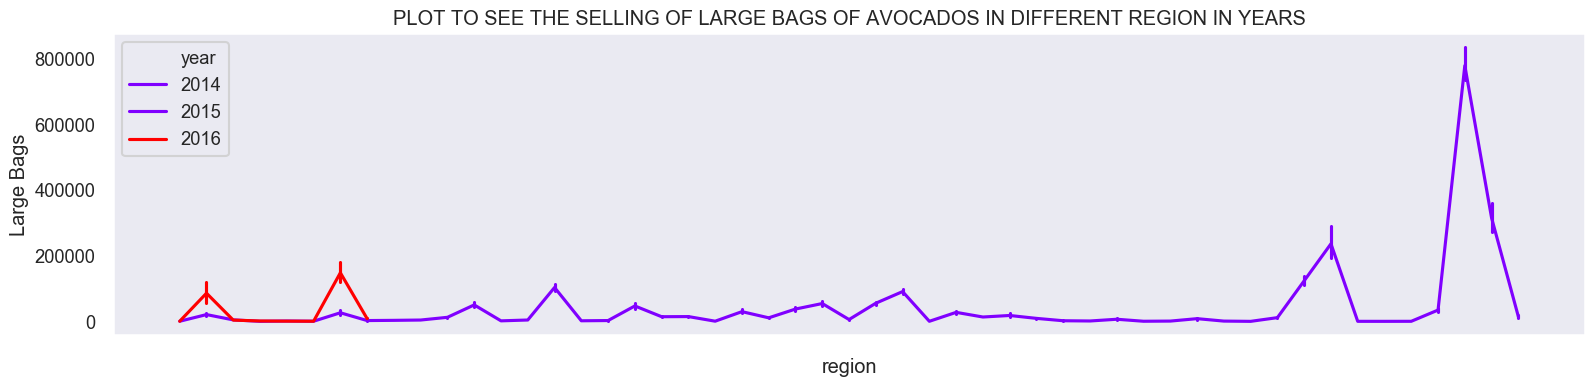

In [40]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
M=sns.lineplot(x='region',y='Large Bags',hue='year',palette='rainbow', data=avo,ci=95,err_style='bars')
M.set_xticklabels(M.get_xticklabels(),rotation=70)
plt.title('PLOT TO SEE THE SELLING OF LARGE BAGS OF AVOCADOS IN DIFFERENT REGION IN YEARS')
plt.show()
                 

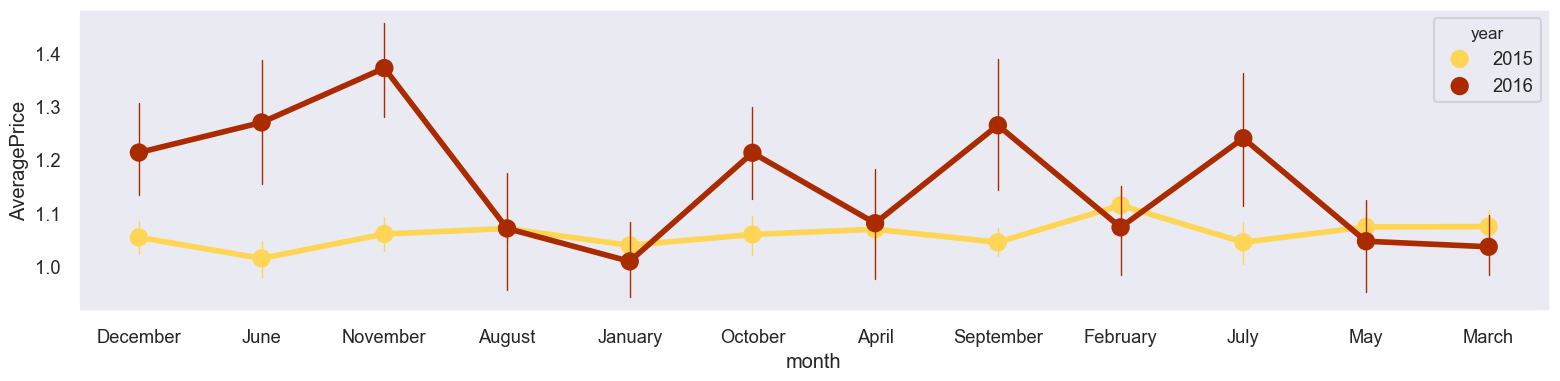

In [41]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.pointplot(x='month',y='AveragePrice',hue='year',data=avo,ci=95,markers='o',linestyle='.',orient='v',palette='afmhot_r',errwidth='1')

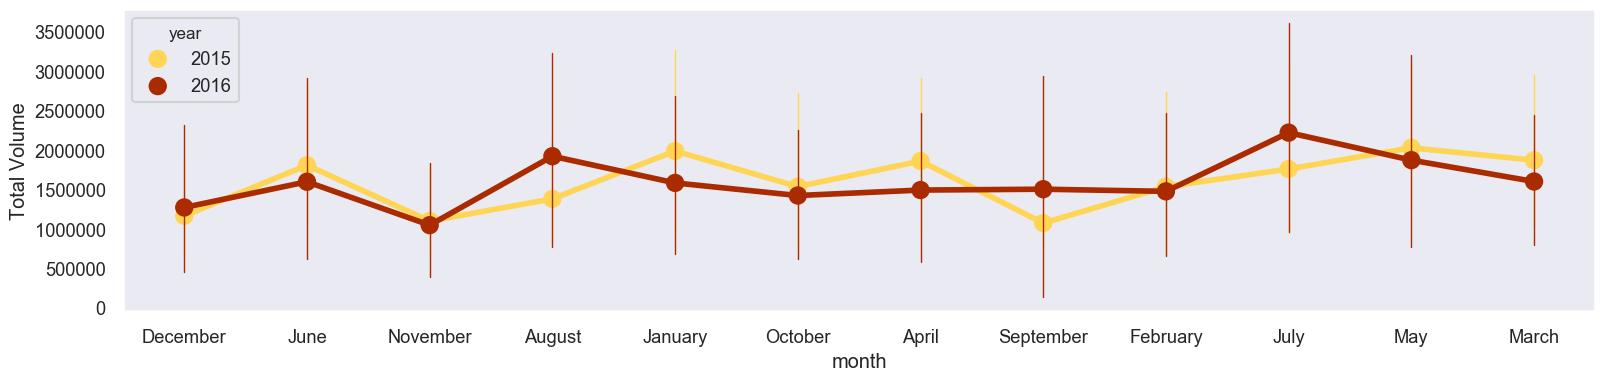

In [42]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.pointplot(x='month',y='Total Volume',hue='year',data=avo,ci=95,markers='o',linestyle='.',orient='v',palette='afmhot_r',errwidth='1')

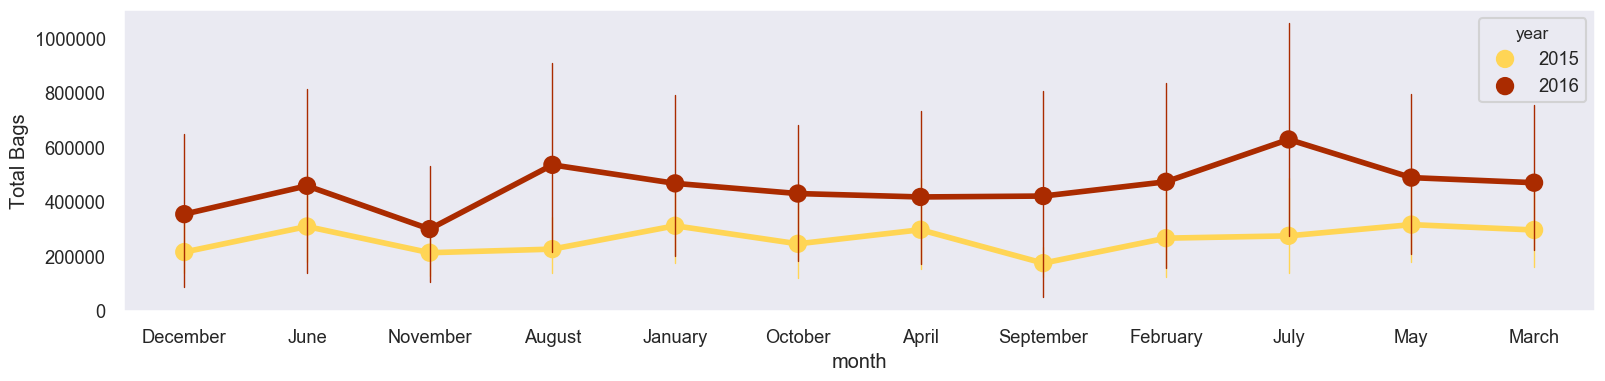

In [43]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.pointplot(x='month',y='Total Bags',hue='year',data=avo,ci=95,markers='o',linestyle='.',orient='v',palette='afmhot_r',errwidth='1')

                                    SELLING OF AVOCADO HAS INCREASED IN 2016 

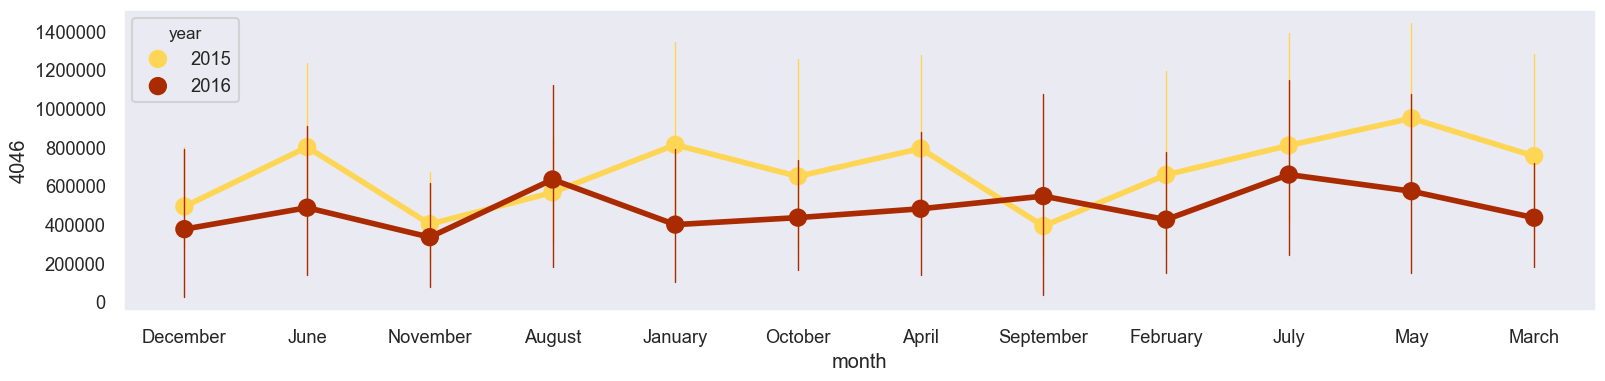

In [44]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.pointplot(x='month',y='4046',hue='year',data=avo,ci=95,markers='o',linestyle='.',orient='v',palette='afmhot_r',errwidth='1')

                        THE SELL OF PLU 4046 WAS HIGHEST IN  MAY OF 2015

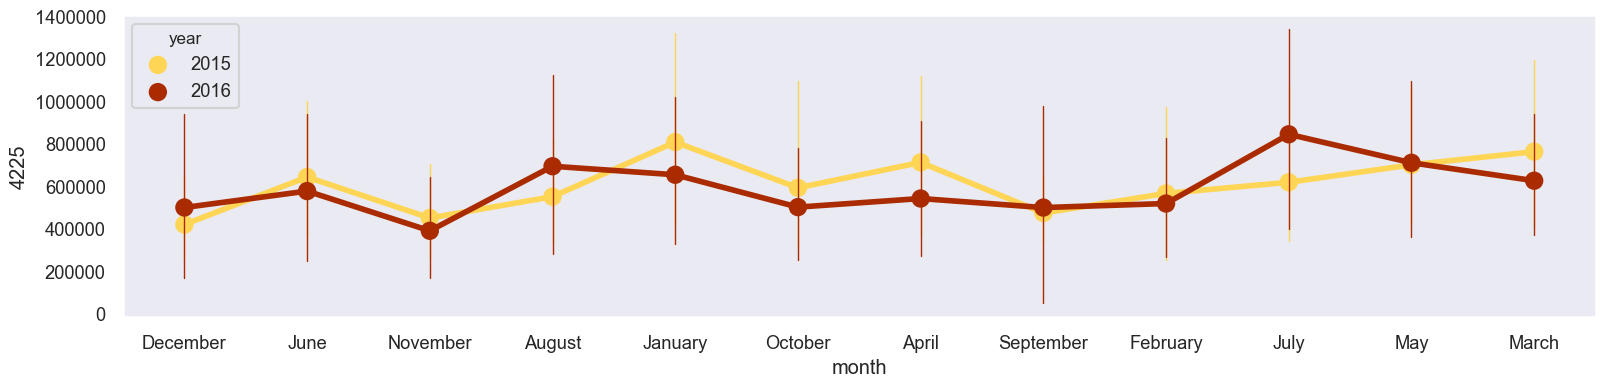

In [45]:
sns.set(style='dark')
plt.figure(figsize=(19,4),dpi=100)
sns.set_context('talk',font_scale=0.8)
sns.pointplot(x='month',y='4225',hue='year',data=avo,ci=95,markers='o',linestyle='.',orient='v',palette='afmhot_r',errwidth='1')

In [46]:
#label encoding the region column 
lbl=LabelEncoder()
avo['region']=lbl.fit_transform(avo['region'])
avo['type']=lbl.fit_transform(avo['type'])

In [47]:
mapp={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
      'October':10,'November':11,'December':12}
avo['month']=avo['month'].map(mapp)


In [48]:
#using boxplot and zscore to remove outliers

In [49]:
#dropping unnecessary columns
#as there is only 1 type of avocado is in the dataset
avo.drop(['type','year',],axis=1,inplace=True)
avo

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,11
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,9


In [50]:
cl=avo.columns.values
cl

array(['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'region',
       'month'], dtype=object)

In [51]:
avo.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
region            int32
month             int64
dtype: object

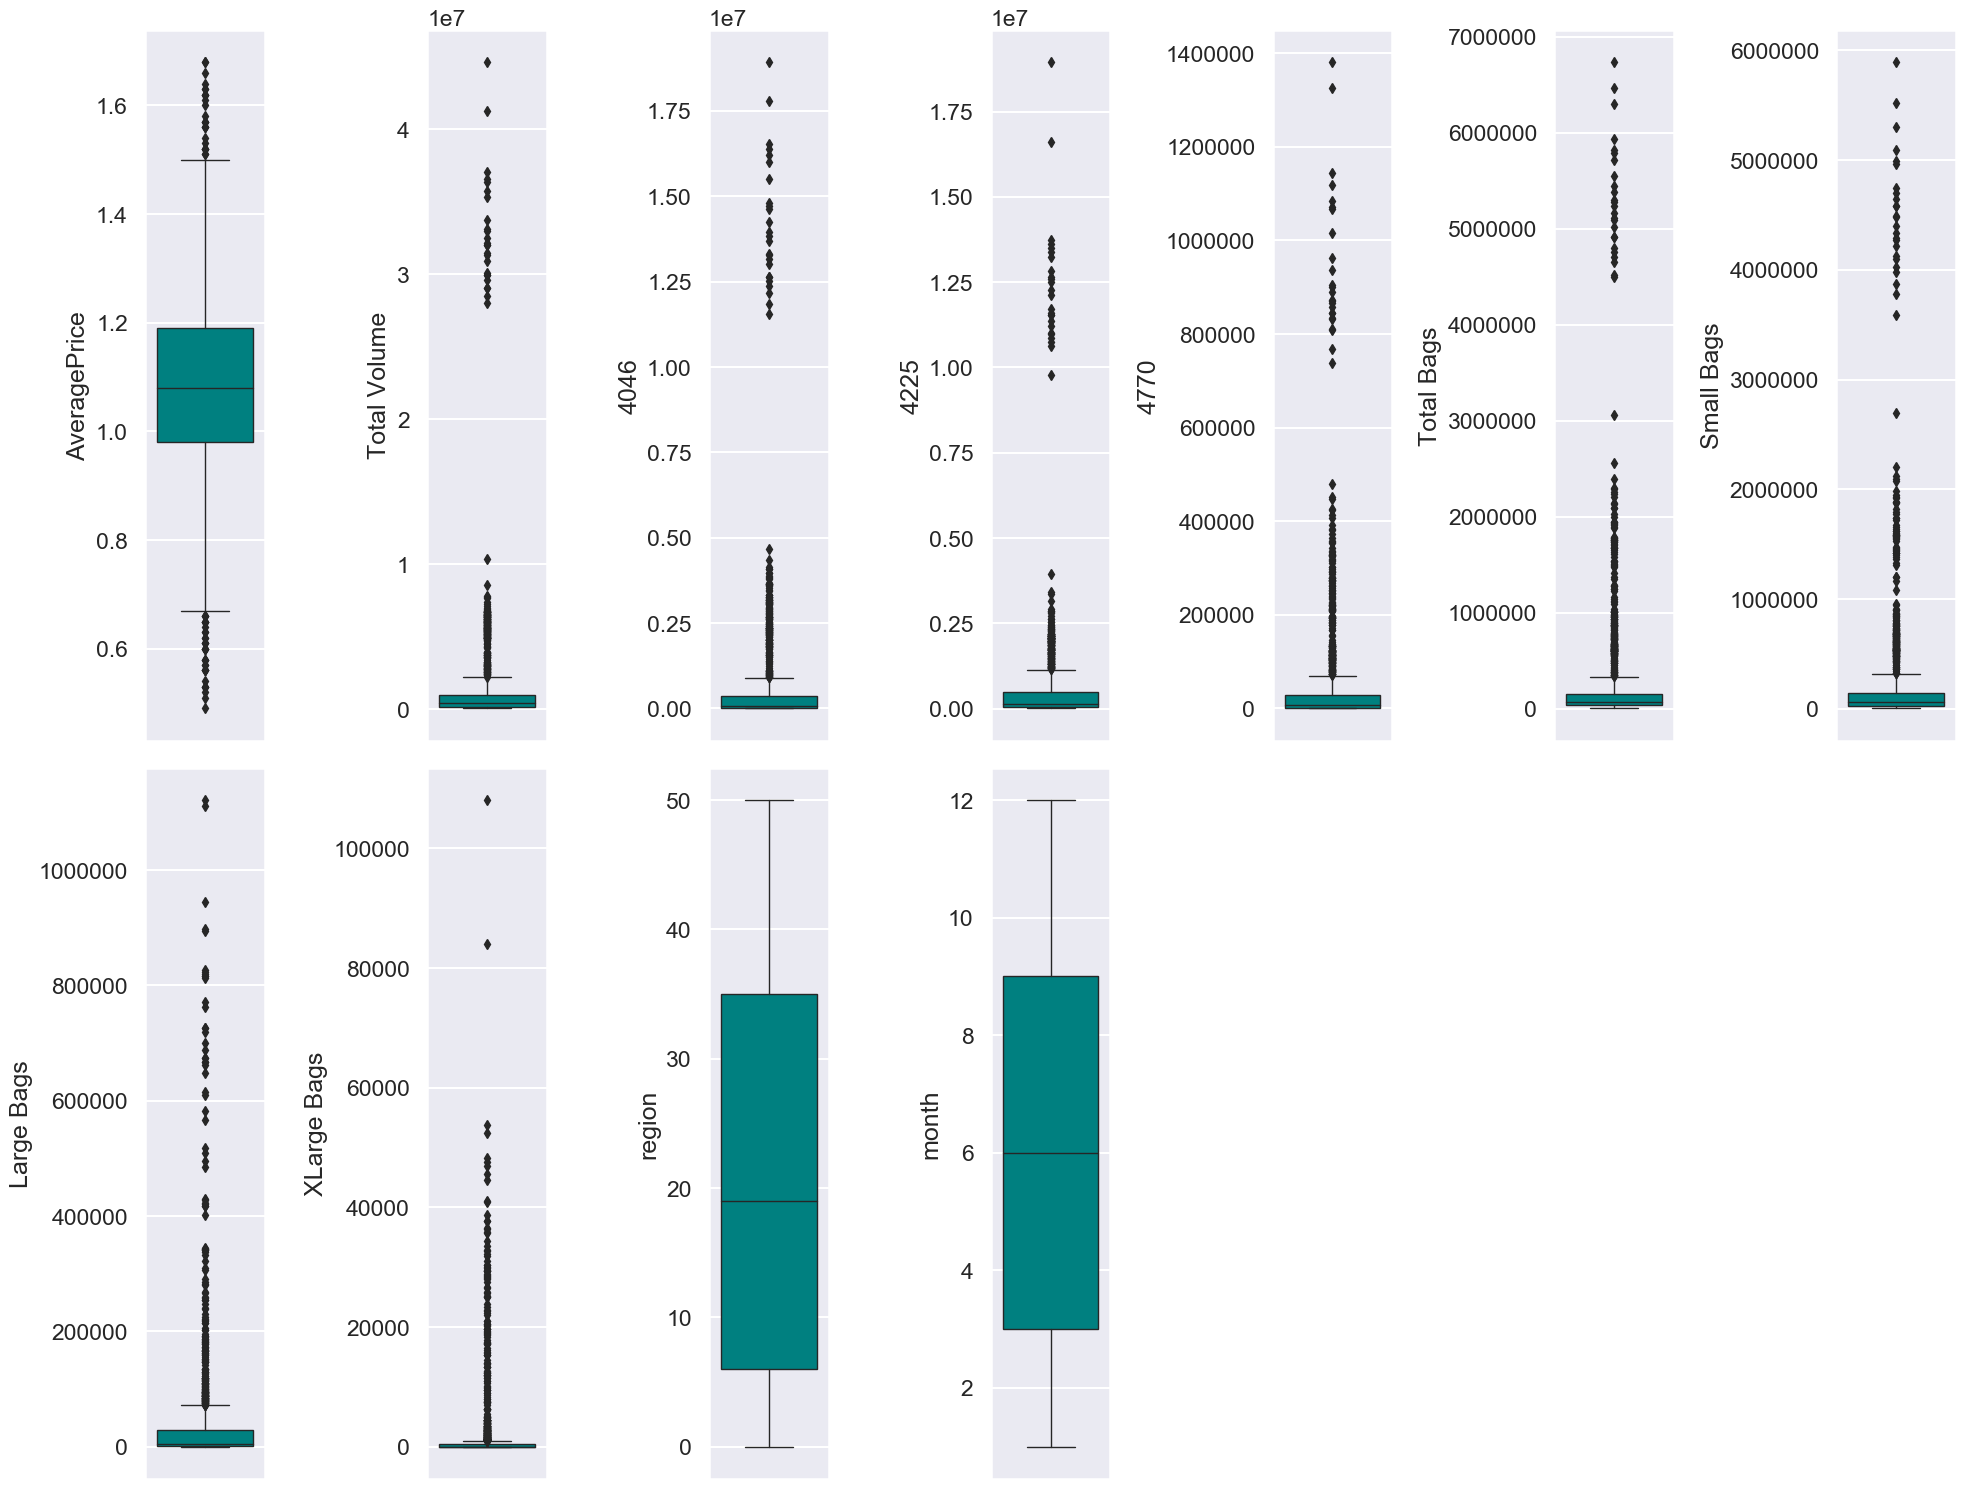

In [52]:
sns.set(style='darkgrid')
plt.figure(dpi=100,figsize=(20,30))
sns.set_context('talk',font_scale=1)
for i in range (0,11):
    plt.subplot(4,7,i+1)
    sns.boxplot(avo[cl[i]],color='teal',linewidth=1,saturation=14,orient='v')
plt.tight_layout()

In [53]:
#checking for outliers
z=np.abs(zscore(avo))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 1.3143384 ,
        1.62415427],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 1.3143384 ,
        1.62415427],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 1.3143384 ,
        1.62415427],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 0.88028586,
        1.25685839],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 0.88028586,
        0.75985047],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 0.88028586,
        0.75985047]])

In [54]:
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [55]:
#checking few values
print( z[398][8],'\n',z[1203][7],'\n',z[1182][2])

4.511782013083507 
 6.518058161007225 
 7.217961858296554


In [56]:
avocado=avo[(z<3).all(axis=1)]

In [57]:
print('The shape before outlier removal:\t',avo.shape,'\nThe shape after outlier removal:\t',avocado.shape,
      '\nSo a total of',len(avo)-len(avocado),'rows has been removed')

The shape before outlier removal:	 (1517, 11) 
The shape after outlier removal:	 (1436, 11) 
So a total of 81 rows has been removed


In [58]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,11
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,10
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,9
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,9


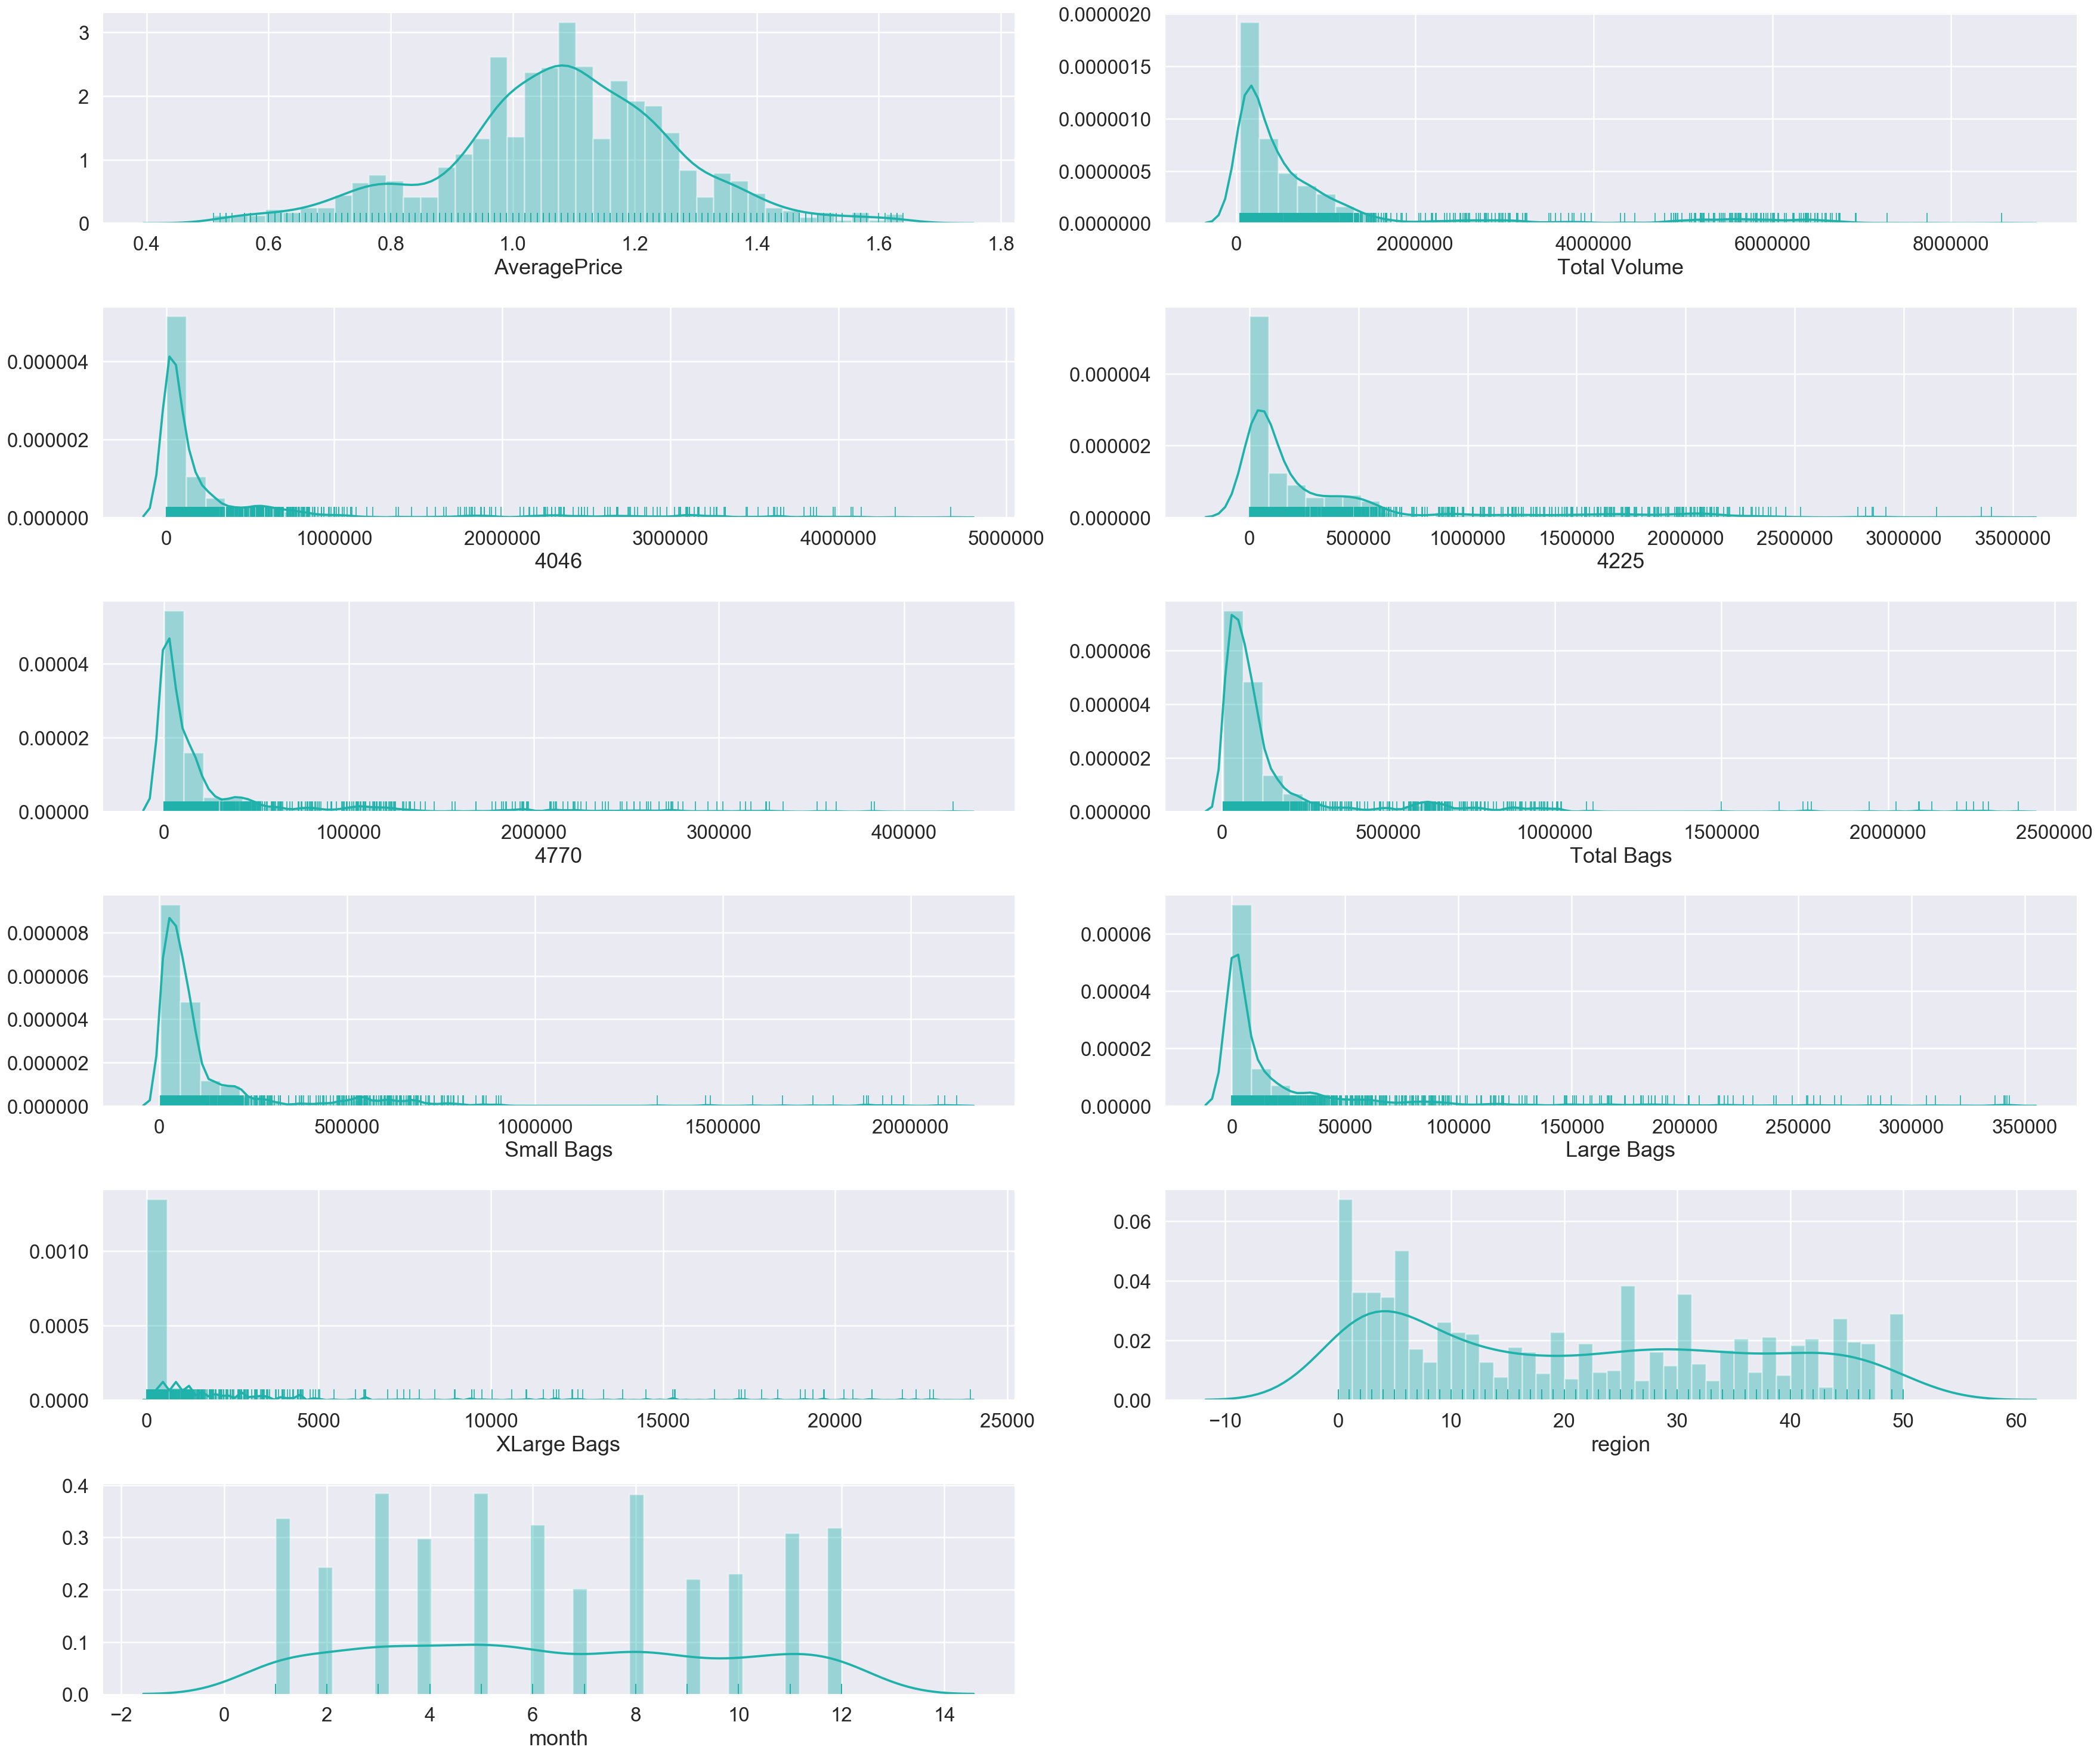

In [59]:
#plotting distplot to see the distribution of the attributes
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(30,25))
sns.set_context('talk',font_scale=1.2)
for i in range (0,11):
    plt.subplot(6,2,i+1)
    sns.distplot(avocado[cl[i]],bins=40,hist=True,kde=True,rug=True,color='lightseagreen') 
plt.tight_layout()


In [60]:
avocado.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
region          0.276276
month           0.111898
dtype: float64

In [61]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and must be removed.
for i in avocado.columns:
    if avocado.skew().loc[i]>0.55:
        avocado[i]=np.log1p(avocado[i])
print(avocado.skew())

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
region          0.276276
month           0.111898
dtype: float64


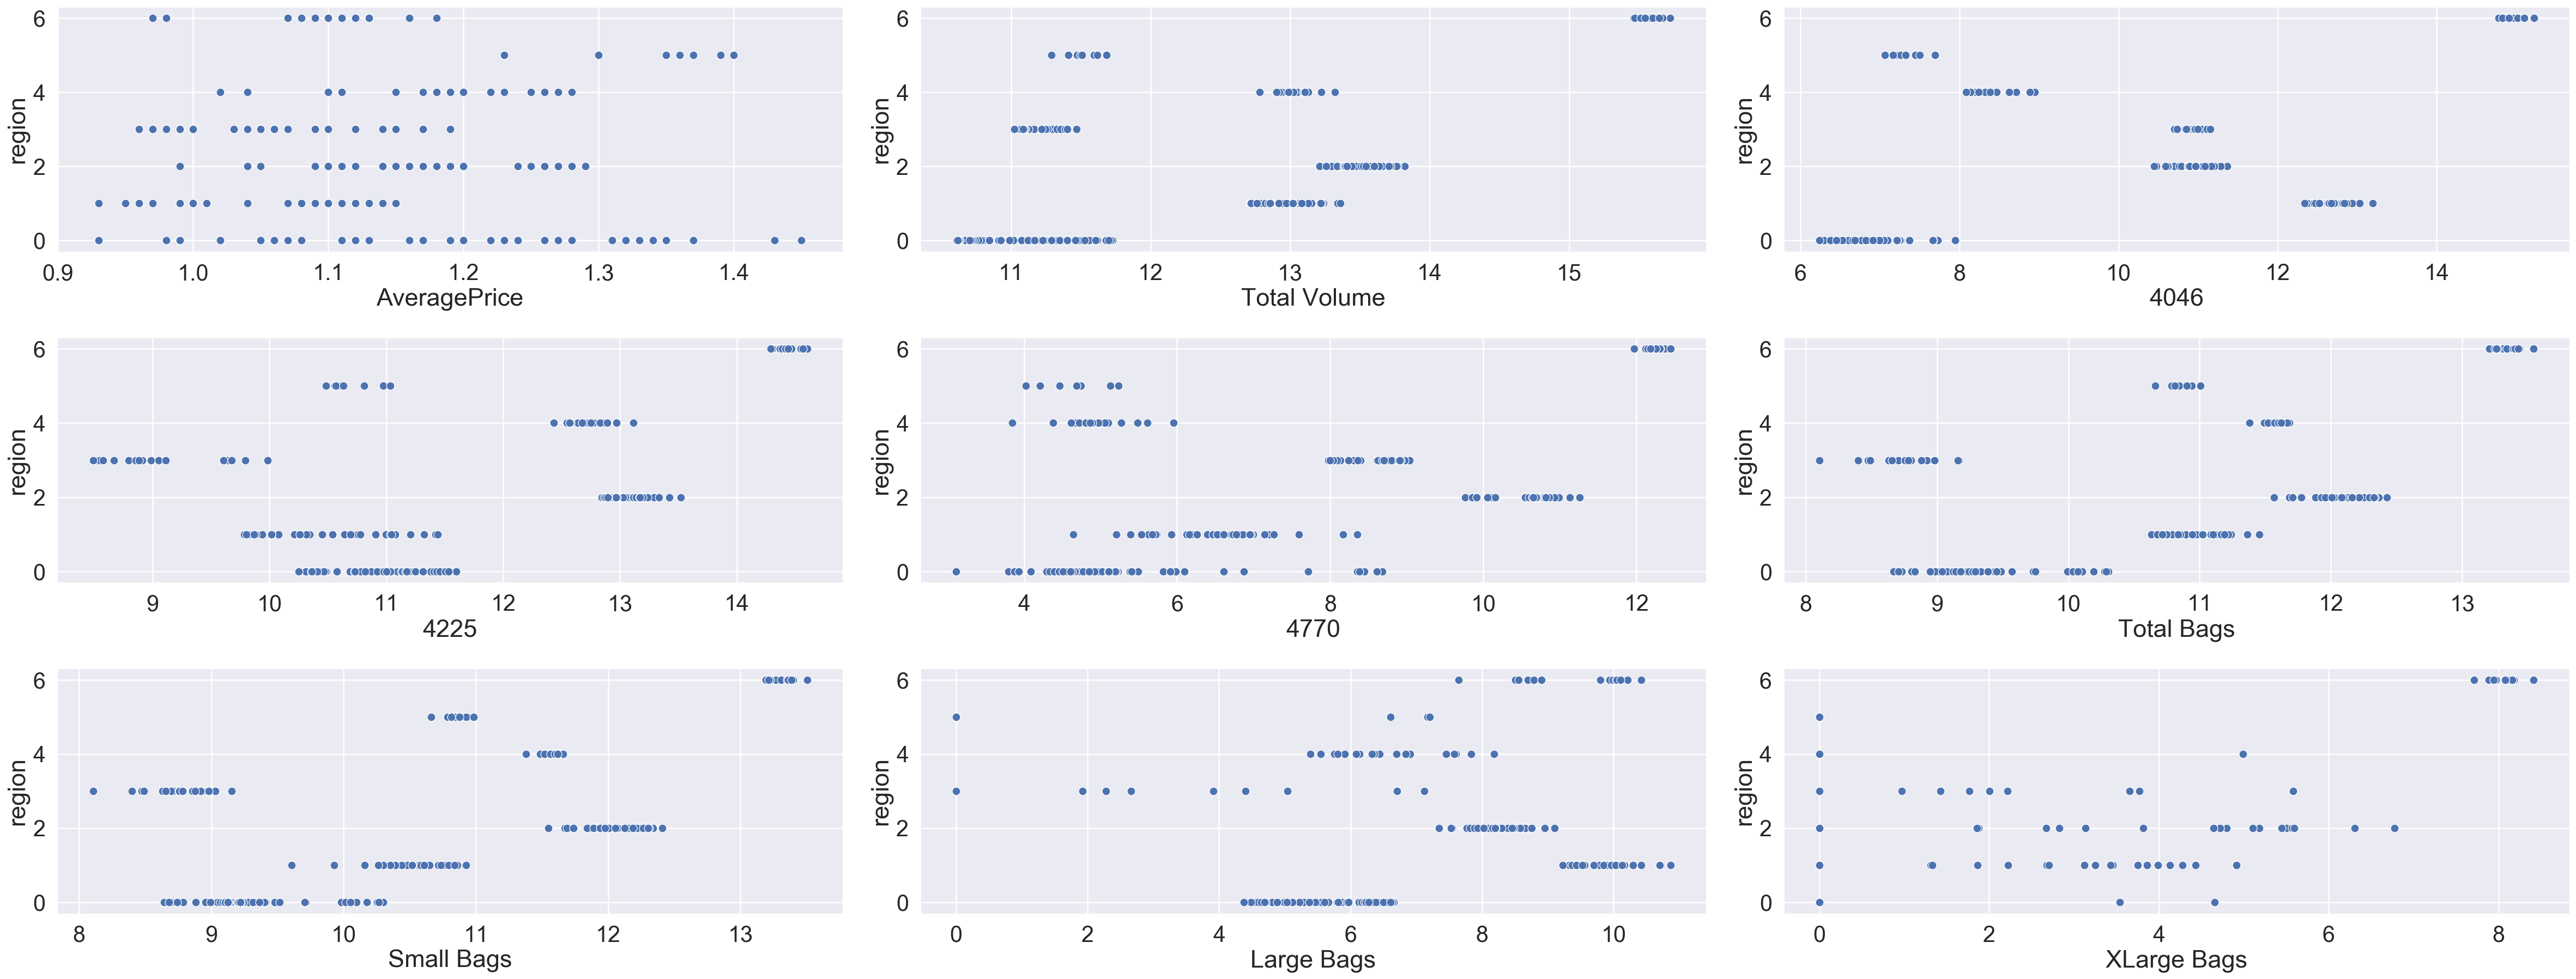

In [62]:
#scatterplot
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(40,40))
sns.set_context('talk',font_scale=1.5)
for i in range (0,9):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(avocado[cl[i]]).head(400), y=(avocado['region']).head(200),ci=80,palette='gnuplot') 
plt.tight_layout()
#taking and plotting the scatter plot for the first 400 rows of attributes vs region

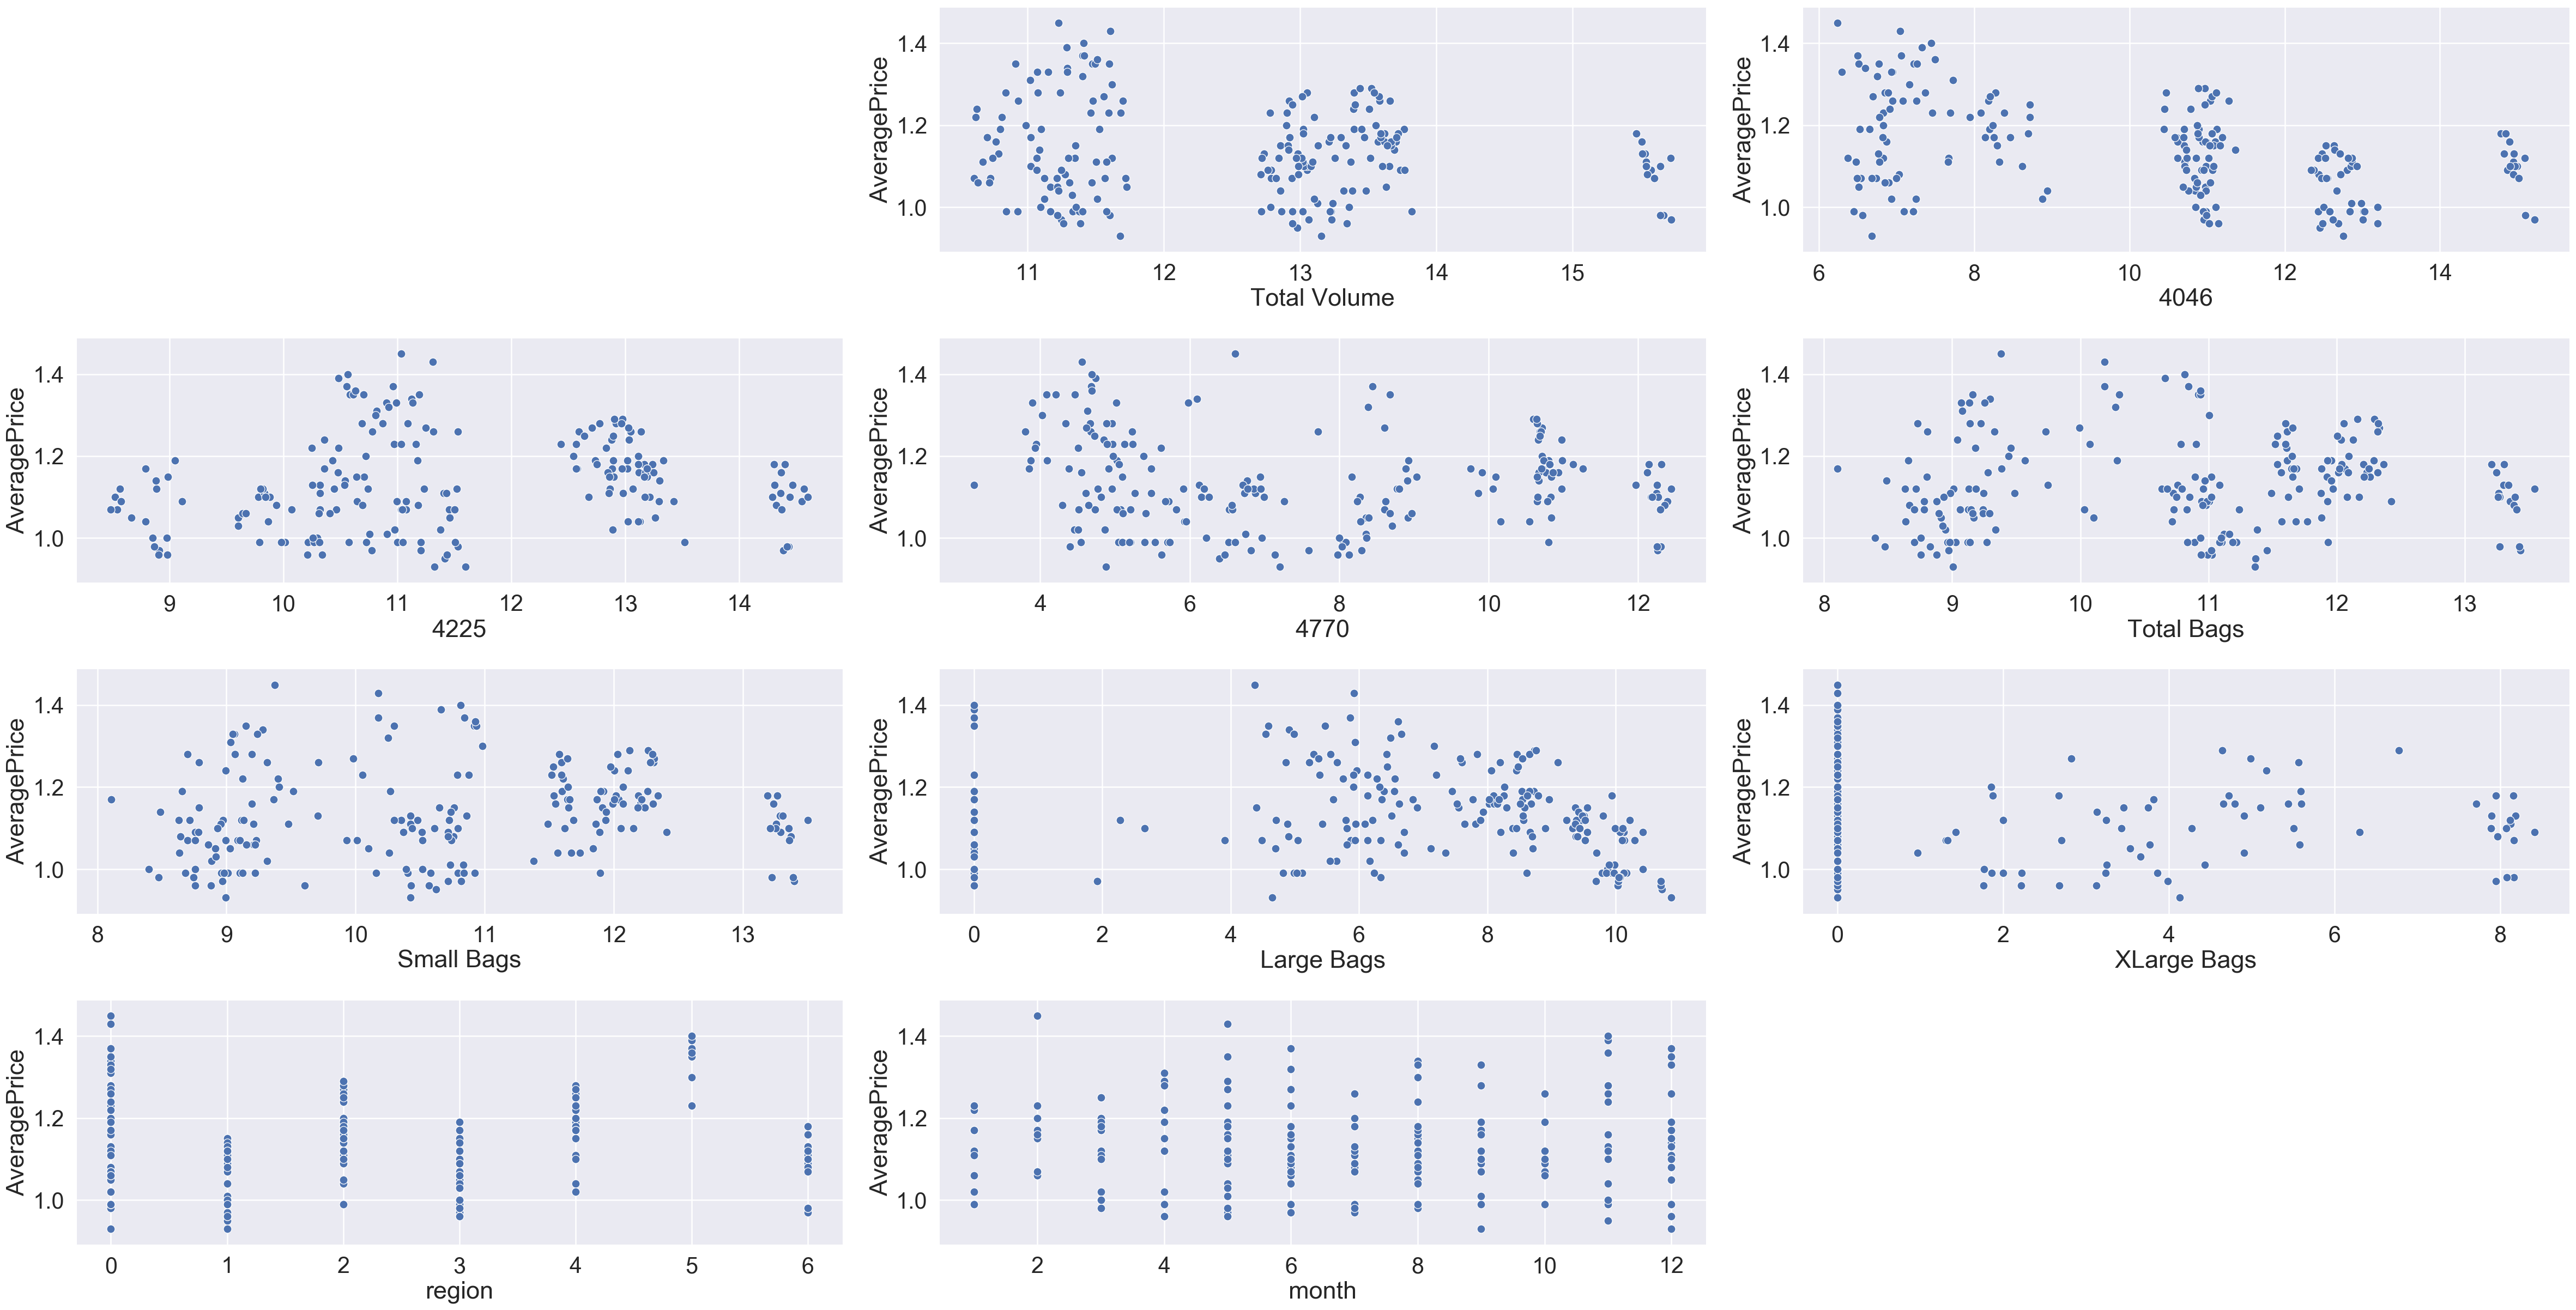

In [63]:
sns.set(style='darkgrid')
plt.figure(dpi=120,figsize=(40,40))
sns.set_context('talk',font_scale=1.5)
for i in range (1,11):
    plt.subplot(8,3,i+1)
    sns.scatterplot(x=(avocado[cl[i]]).head(200), y=(avocado['AveragePrice']).head(200),ci=80,palette='gnuplot') 
plt.tight_layout()
#plotting the scatterplot of first 200 rows of all attributes vs the Average price  

In [64]:
#corelation
avo_cr=avocado.corr()
avo_cr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
AveragePrice,1.000000,-0.352485,-0.543621,-0.117041,-0.292675,-0.193154,-0.146209,-0.205546,-0.059247,-0.212618,0.066069
Total Volume,-0.352485,1.000000,0.714443,0.861367,0.562389,0.916026,0.897252,0.524451,0.267479,0.158226,-0.089703
4046,-0.543621,0.714443,1.000000,0.338558,0.511887,0.569921,0.524766,0.457328,0.181402,0.311511,-0.082514
4225,-0.117041,0.861367,0.338558,1.000000,0.464000,0.801631,0.811968,0.369371,0.232137,0.087723,-0.054059
4770,-0.292675,0.562389,0.511887,0.464000,1.000000,0.488409,0.506071,0.277250,0.481333,0.009062,-0.028077
Total Bags,-0.193154,0.916026,0.569921,0.801631,0.488409,1.000000,0.979557,0.533404,0.329304,0.119255,-0.077263
Small Bags,-0.146209,0.897252,0.524766,0.811968,0.506071,0.979557,1.000000,0.414829,0.315655,0.105316,-0.081533
Large Bags,-0.205546,0.524451,0.457328,0.369371,0.277250,0.533404,0.414829,1.000000,0.173746,0.043602,-0.047879
XLarge Bags,-0.059247,0.267479,0.181402,0.232137,0.481333,0.329304,0.315655,0.173746,1.000000,-0.214306,0.055392
region,-0.212618,0.158226,0.311511,0.087723,0.009062,0.119255,0.105316,0.043602,-0.214306,1.000000,0.006980


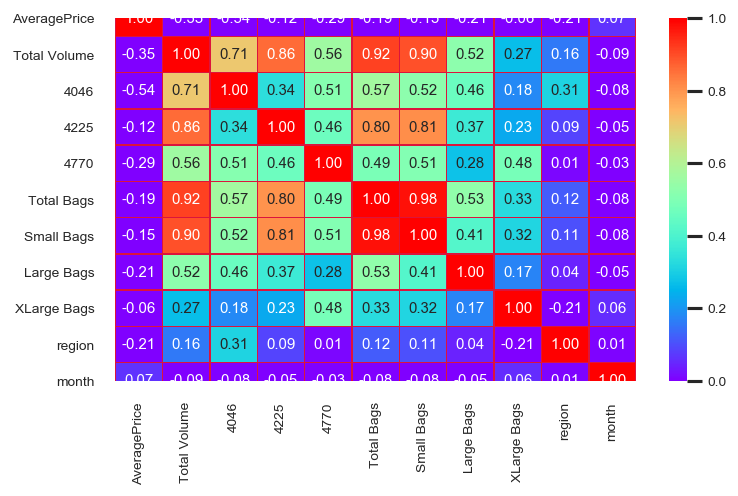

In [65]:
#heatmap
plt.figure(dpi=120,figsize=(7,4))
sns.set_context('talk',font_scale=0.5)
sns.heatmap(avo_cr,annot=True,fmt='.2f',cmap='rainbow',linecolor='crimson',linewidth=0.3,vmax=1,vmin=0)
plt.show()

# REGRESSION

In [66]:
#importing important librarier for modelling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [67]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,11
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7,10
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7,9
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7,2
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7,9


In [68]:
#splitting the dataset
x=avocado.iloc[:,1:]
y=avocado.iloc[:,0]

In [69]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,12
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,12
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,12
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,11
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7,10
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7,9
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7,2
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7,9


In [70]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [71]:
#using standardscaler to scale the data within a range of 0 +/-2
ss=StandardScaler()
x=ss.fit_transform(x)

In [72]:
x

array([[-1.41093543, -1.84734499, -0.50791653, ..., -0.77552838,
        -1.32281743,  1.6370045 ],
       [-1.53565988, -2.04282289, -0.63518322, ..., -0.77552838,
        -1.32281743,  1.6370045 ],
       [-0.92782951, -1.96816868, -0.06269814, ..., -0.77552838,
        -1.32281743,  1.6370045 ],
       ...,
       [-0.60188503, -0.11877204, -0.5265446 , ...,  1.33246252,
        -0.87930451, -1.2523004 ],
       [-0.55566806, -0.04848702, -0.51812425, ..., -0.77552838,
        -0.87930451,  0.77021303],
       [-0.58186397, -0.15181664, -0.51099782, ..., -0.77552838,
        -0.87930451,  0.77021303]])

In [73]:
y=np.array(y)
y=y.reshape(-1,1)
print('shape of x =',x.shape,'\nshape of y =',y.shape)

shape of x = (1436, 10) 
shape of y = (1436, 1)


In [74]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    r2=0
    for i in range(27,240):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
           '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

In [75]:
lireg=LinearRegression()
m1=model(lireg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  201 
 r2 score =  0.4406517628144876 
 mean abs error value (MAE)=  0.11532269194651418 
 mean squared error value (MSE)=  0.020417160062685607 
 & root mean sq error (RMSE)=  0.14288862817833198


In [76]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,x,y,cv=30,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= -0.309924518959133


LASSO REGRESSION

In [77]:
import warnings
warnings.filterwarnings('ignore')

#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001)}
lso_rsv=rsv(lso,lso_para,cv=30,n_iter=20)
lso_rsv.fit(x,y)
print('best_score=',lso_rsv.best_score_)
print('best_parameters=',lso_rsv.best_params_)

best_score= -0.23369166266127123
best_parameters= {'alpha': 0.01}


In [78]:
lso=Lasso(alpha=0.01)
m2=model(lso,x,y)

In this Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  201 
 r2 score =  0.32731528755428396 
 mean abs error value (MAE)=  0.12470047657266027 
 mean squared error value (MSE)=  0.024554133780474805 
 & root mean sq error (RMSE)=  0.15669758702824624


In [79]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,x,y,cv=30,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= -0.2328025824625898


RIDGE REGRESSION

In [80]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12)}
rid_rsv=rsv(rid,rid_para,cv=30,n_iter=20)
rid_rsv.fit(x,y)
print('best_score=',rid_rsv.best_score_)
print('best_parameters=',rid_rsv.best_params_)

best_score= -0.2699927145098139
best_parameters= {'alpha': 12}


In [81]:
rid=Ridge(alpha=12)
m3=model(rid,x,y)


In this Ridge(alpha=12, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) model 
 Random State=  201 
 r2 score =  0.4270073700603283 
 mean abs error value (MAE)=  0.11592760488131403 
 mean squared error value (MSE)=  0.02091520355741718 
 & root mean sq error (RMSE)=  0.14462089599161382


In [82]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,x,y,cv=40,scoring='r2')
print('the R2 score at  RIDGE model is=',rid_scr.mean())

the R2 score at  RIDGE model is= -0.6365050737421095


DECISION TREE CLASSIFIER

In [83]:
#check for best parameters using RandomizedSearchCV
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':range(1,8),
    'min_samples_split':range(3,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
dtr_rsv.best_score_
dtr_rsv.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'max_depth': 4,
 'criterion': 'mae'}

In [84]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,min_samples_split=4,splitter='best')
m4=model(dtr,x,y)

In this DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') model 
 Random State=  188 
 r2 score =  0.632611988575507 
 mean abs error value (MAE)=  0.08678348621990636 
 mean squared error value (MSE)=  0.013410286000200384 
 & root mean sq error (RMSE)=  0.11580278925915552


In [85]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= -0.6316769637335867


KNEIGHBORS REGRESSOR

In [87]:
knr=KNeighborsRegressor()
kp={'n_neighbors':range(2,18),'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(4,12)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
k_rsv.best_params_

{'n_neighbors': 7, 'leaf_size': 6, 'algorithm': 'auto'}

In [88]:
knr=KNeighborsRegressor(n_neighbors=7,leaf_size=8,algorithm='kd_tree')
m5=model(knr,x,y)

In this KNeighborsRegressor(algorithm='kd_tree', leaf_size=8, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform') model 
 Random State=  124 
 r2 score =  0.714929967846025 
 mean abs error value (MAE)=  0.07856811402055022 
 mean squared error value (MSE)=  0.010405540035039537 
 & root mean sq error (RMSE)=  0.10200754891202679


In [89]:
#CHECKING FOR OVER/UNDER FITTING
knr_scr=cvs(knr,x,y,cv=40,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= -0.4741365919492808


SUPPORT VECTOR REGRESSOR

In [90]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=20,n_iter=40,)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'rbf', 'gamma': 0.01}

In [91]:
svr=SVR(kernel='rbf',gamma=0.01,C=10)
m6=model(svr,x,y)

In this SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  73 
 r2 score =  0.6442480964028394 
 mean abs error value (MAE)=  0.08867198231944842 
 mean squared error value (MSE)=  0.012985548314044916 
 & root mean sq error (RMSE)=  0.11395415005187357


In [92]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= -0.6943116322670961


RANDOM FOREST REGRESSOR

In [93]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,8),'min_samples_leaf':range(3,6),'max_depth':[3,8,13]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 130,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 13}

In [94]:
rfr=RandomForestRegressor(n_estimators=250,max_features=2,min_samples_leaf=4,max_depth=8)
m7=model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  111 
 r2 score =  0.7633149866382737 
 mean abs error value (MAE)=  0.07061592843083148 
 mean squared error value (MSE)=  0.008639404723184155 
 & root mean sq error (RMSE)=  0.09294839817438574


In [95]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',rfr_scr.mean())

the R2 score at SVR model is= -0.23887189589823743


Putting all those scores obtained in a single dataframe for batter visualization and judgement

In [96]:
infos=[['LINEAR_REG',201,0.440651,-0.309924],
      ['LASSO',201,0.327315,-0.232802],
      ['RIDGE',201,0.427007,-0.636505],
      ['DECISION TREE REGRESSOR',188,0.63229,-0.617619],
      ['SVR',73,0.6442480,-0.6943116],
      ['KNEIGHBORS_REGRESSOR',124,0.714929,-0.4741365],
      ['RANDOM FOREST REGRESSOR',111,0.763548,-0.263068 ]]


SCOREBORD=pd.DataFrame(infos,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])
SCOREBORD
#R2_SCORE W/O CV, R2_SCORE WITH CV represents the r2 score obtained from modelling and cross_validation respectively

,MOD_NAME,RAND_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,201,0.440651,-0.309924
1,LASSO,201,0.327315,-0.232802
2,RIDGE,201,0.427007,-0.636505
3,DECISION TREE REGRESSOR,188,0.632290,-0.617619
4,SVR,73,0.644248,-0.694312
5,KNEIGHBORS_REGRESSOR,124,0.714929,-0.474137
6,RANDOM FOREST REGRESSOR,111,0.763548,-0.263068


from the above tabulation it is clear that we need to boost the algorithms with the help of AdaBoostRegressor
so using model "KNR" as base estimator

In [97]:
from sklearn.ensemble import AdaBoostRegressor

In [98]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=124)
knr=KNeighborsRegressor(n_neighbors=7,leaf_size=8,algorithm='kd_tree')
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=knr)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

best parameters: {'learning_rate': 0.1}

 best score: 0.6218309133198597


In [99]:
abr=AdaBoostRegressor(base_estimator=knr,n_estimators=250,learning_rate=0.1)
model(abr,x,y)

In this AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree',
                                                     leaf_size=8,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=7,
                                                     p=2, weights='uniform'),
                  learning_rate=0.1, loss='linear', n_estimators=250,
                  random_state=None) model 
 Random State=  128 
 r2 score =  0.7385506551694397 
 mean abs error value (MAE)=  0.07696055684454757 
 mean squared error value (MSE)=  0.00954334485534353 
 & root mean sq error (RMSE)=  0.09769004481186162


In [100]:
#saving the final model

In [102]:
import joblib
joblib.dump(abr,'avocado_regr_abr_.pkl')

['avocado_regr_abr_.pkl']

# CLASSIFICATION

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [104]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,11
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7,10
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7,9
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7,2
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7,9


In [105]:
x=avocado.drop(columns=['region'])
y=avocado[['region']]

In [106]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,11
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,10
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,9
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,2
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,9


In [107]:
y

,region
0,0
1,0
2,0
3,0
4,0
...,...
1512,7
1513,7
1514,7
1515,7


In [108]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n shape of x=', x.shape)

[[ 1.34498919 -1.41093543 -1.84734499 ... -0.91741949 -0.77552838
   1.6370045 ]
 [ 1.451388   -1.53565988 -2.04282289 ... -0.90419602 -0.77552838
   1.6370045 ]
 [-0.78298709 -0.92782951 -1.96816868 ... -0.88743353 -0.77552838
   1.6370045 ]
 ...
 [ 2.14298029 -0.60188503 -0.11877204 ...  0.42677659  1.33246252
  -1.2523004 ]
 [ 2.08978089 -0.55566806 -0.04848702 ...  0.42750703 -0.77552838
   0.77021303]
 [ 1.87698326 -0.58186397 -0.15181664 ...  0.53012844 -0.77552838
   0.77021303]] 

 shape of x= (1436, 10)


In [109]:
y=np.array(y)
print(y.shape)

(1436, 1)


In [110]:
#designing a function to get the best random state and other scores 
def mod(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test) 
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\nThe best suited random_score is: ', final_rst, '\nWith an accuracy score of: ', max_ac_score)
    print('Confusion matrix:\n')
    print('Classificatio Report:\n', clr)
    print('\nconfusion_matrix:\n',conf)
    return final_rst

DECISION_TREE_CLASSIFIER

In [111]:
#using DecisionTreeClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_rs=rsv(dtc,dtc_para,cv=40,n_iter=30)
dtc_rs.fit(x,y)
print(dtc_rs)
print(dtc_rs.best_score_)
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=40, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [112]:
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=9)
mo1=mod(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 
The best suited random_score is:  157 
With an accuracy score of:  0.9105367793240556
Confusion matrix:

Classificatio Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.92      0.71      0.80        17
           2       0.86      1.00      0.92        18
           3       0.91      0.95      0.93        22
           4       0.95      0.91      0.93        22
           5       0.94      0.94      0.94        17
           6       0.94      1.00      0.97        15
           7       1.00  

In [113]:
#cross_val_score to check for over/under fitting of dtc model
dtc_scr=cvs(dtc,x,y,scoring='accuracy',cv=30)
print('The mean accuracy score produced by DTC model is = ', dtc_scr.mean())

The mean accuracy score produced by DTC model is =  0.8848399732222767


K_NEIGHBORS_CLASSIFIER

In [114]:
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
knc_rs=rsv(knc,knc_para,cv=30,n_iter=40)
knc_rs.fit(x,y)
print(knc_rs)
print(knc_rs.best_score_)
print(knc_rs.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [30, 40, 50],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.8022284122562674
{'n_neighbors': 2

In [115]:
knc=KNeighborsClassifier(n_neighbors=21,algorithm='ball_tree',leaf_size=30)
mo2=mod(knc,x,y)


In this KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform') 
The best suited random_score is:  63 
With an accuracy score of:  0.7912524850894632
Confusion matrix:

Classificatio Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.64      0.82      0.72        17
           2       0.49      1.00      0.65        18
           3       1.00      0.82      0.90        22
           4       0.75      0.82      0.78        22
           5       1.00      0.71      0.83        17
           6       0.88      1.00      0.94        15
           7       0.73      0.67      0.70        12
           8       1.00      0.36      0.53        11
           9       0.77      1.00      0.87        23
          10       0.50      0.40      0.44         5
          11       1.0

In [116]:
knc_scr=cvs(knc,x,y,scoring='accuracy',cv=40)
print('The mean accuracy score produced by KNC model is = ', knc_scr.mean())

The mean accuracy score produced by KNC model is =  0.8370893106305963


SUPPORT_VECTOR_CLASSIFIER

In [117]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=30,n_iter=40)
svc_rsv.fit(x,y)
print(svc_rsv)
print(svc_rsv.best_score_)
print(svc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.9463788300835655
{'kernel': 'linear', 'gamma': 0.01}


In [119]:
svc=SVC(kernel='linear',gamma=0.01,C=5)
mo3=mod(svc,x,y)

In this SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
The best suited random_score is:  77 
With an accuracy score of:  0.974155069582505
Confusion matrix:

Classificatio Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.82      0.82      0.82        17
           2       1.00      1.00      1.00        18
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00        22
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        15
           7       0.75      0.75      0.75        12
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        23
          10       0.80      0.80      0

In [120]:
svc_scr=cvs(svc,x,y,scoring='accuracy',cv=40)
print('The mean accuracy score produced by SVC model is = ', svc_scr.mean())

The mean accuracy score produced by SVC model is =  0.9721151921401798


RANDOM_FOREST_CLASSIFIER

In [122]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[150,250],'min_samples_leaf':range(3,6),'max_depth':[3,8,13]}
rfc_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print(rfr_rsv.best_score_)
print(rfr_rsv.best_params_)

RandomizedSearchCV(cv=40, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse', max_depth=8,
                                                   max_features=2,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=4,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=250,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None, verbose=0,
                                             

In [125]:
rfc=RandomForestClassifier(n_estimators=130,criterion='gini',min_samples_leaf=3,max_depth=13)
mo4=mod(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
The best suited random_score is:  87 
With an accuracy score of:  0.9701789264413518
Confusion matrix:

Classificatio Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.94      0.94      0.94        17
           2       0.95      1.00      0.97        18
           3       1.00      0.95      0.98        22
           4       0.92      1.00      0.96        22
           5       0.94      1.00      0.97       

In [126]:
rfc_scr=cvs(rfc,x,y,scoring='accuracy',cv=40)
print('The mean accuracy score produced by RFC model is = ', rfc_scr.mean())

The mean accuracy score produced by RFC model is =  0.9606964729446812


GRADIENT_BOOSTING_CLASSIFIERS

In [132]:
#so we got the following accuracy scores from the above algorithms with and without cross validation
info=[['DTC',157,0.910536,0.884839],
      ['KNC',63,0.791252,0.837089],
      ['SVC',77,0.97415,0.97211],
      ['RFC',87,0.97018,0.96069]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','RAND_STATE','ACCURACY_SCORE W/O CV','ACCURACY_SCORE WITH CV'])
perf


,MODEL_NAME,RAND_STATE,ACCURACY_SCORE W/O CV,ACCURACY_SCORE WITH CV
0,DTC,157,0.910536,0.884839
1,KNC,63,0.791252,0.837089
2,SVC,77,0.974150,0.972110
3,RFC,87,0.970180,0.960690


so from the above tabulation it is clear that SVC is giving a batter accuracy as compared to other mmodels so selecting SVC as final model

In [134]:
joblib.dump(svc,'AVOCADO_CLA_SVC.pkl')

['AVOCADO_CLA_SVC.pkl']